# Rank histogram

In [3]:
# Read data
cmip = pd.read_csv("./output/data/cmip_agvar_all.csv")
cmip["GEOID"] = cmip["GEOID"].astype(str).str.zfill(5)
cmip.set_index(["AgVar","GEOID","Year"], inplace = True)

nex = pd.read_csv("./output/data/nex_agvar_all.csv")
nex["GEOID"] = nex["GEOID"].astype(str).str.zfill(5)
nex.set_index(["AgVar","GEOID","Year"], inplace = True)

gmfd = pd.read_csv("./output/data/gmfd_agvar_all.csv")
gmfd["GEOID"] = gmfd["GEOID"].astype(str).str.zfill(5)
gmfd.set_index(["AgVar","GEOID","Year"], inplace = True)

In [126]:
# Get CMIP p-values of chi square test of rank-histogram uniformity
cmip_pvals = gmfd.groupby(["AgVar","GEOID"]).sum()
cmip_pvals.rename(columns = {"GMFD" : "pVal"}, inplace = True)

for agvar in gmfd.index.unique(level = "AgVar"):
    for geoid in gmfd.index.unique(level = "GEOID")[:10]:
        cmipString = "AgVar == '" + agvar + "' and GEOID == '" + geoid + "' and Year <= 2005 and Year >= 1956"
        gmfdString = "AgVar == '" + agvar + "' and GEOID == '" + geoid + "' and Year <= 2005"
        
        cmip_ens = cmip.query(cmipString).T.values.reshape((21,50,1))
        gmfd_obs = gmfd.query(gmfdString).values
        pval = chisquare(rankz(gmfd_obs, cmip_ens)[0])[1]

        cmip_pvals.loc[agvar,geoid] = pval

CPU times: user 11.3 s, sys: 535 ms, total: 11.9 s
Wall time: 8.89 s


In [ ]:
# Get NEX p-values of chi square test of rank-histogram uniformity
nex_pvals = gmfd.groupby(["AgVar","GEOID"]).sum()
nex_pvals.rename(columns = {"GMFD" : "pVal"}, inplace = True)

for agvar in gmfd.index.unique(level = "AgVar"):
    for geoid in gmfd.index.unique(level = "GEOID"):
        nexString = "AgVar == '" + agvar + "' and GEOID == '" + geoid + "' and Year <= 2005 and Year >= 1956"
        gmfdString = "AgVar == '" + agvar + "' and GEOID == '" + geoid + "' and Year <= 2005"
        
        nex_ens = nex.query(nexString).T.values.reshape((21,50,1))
        gmfd_obs = gmfd.query(gmfdString).values
        pval = chisquare(rankz(gmfd_obs, nex_ens)[0])[1]
    
        nex_pvals.loc[agvar,geoid] = pval

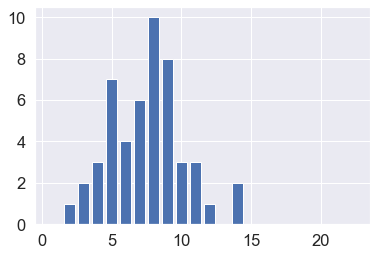

In [31]:
cmip_ens = cmip.query("AgVar == 'gdd' and GEOID == '19049' and Year <= 2005 and Year >= 1956").T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("AgVar == 'gdd' and GEOID == '19049' and Year <= 2005").values
cmip_res = rankz(gmfd_obs, cmip_ens)

plt.bar(range(1,cmip_ens.shape[0]+2), cmip_res[0])
plt.show()

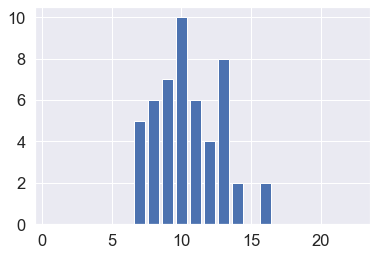

In [41]:
cmip_ens = cmip.query("AgVar == 'egdd' and GEOID == '38013' and Year <= 2005 and Year >= 1956").T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("AgVar == 'egdd' and GEOID == '38013' and Year <= 2005").values
cmip_res = rankz(gmfd_obs, cmip_ens)

plt.bar(range(1,cmip_ens.shape[0]+2), cmip_res[0])
plt.show()

In [129]:
chisquare(cmip_res[0])

Power_divergenceResult(statistic=73.19999999999996, pvalue=1.0689572891878458e-07)

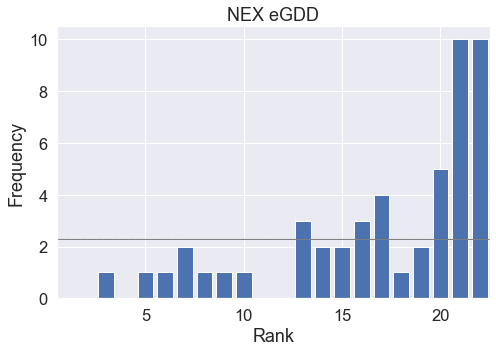

In [16]:
nex_ens = nex.query("AgVar == 'egdd' and GEOID == '31107' and Year <= 2005 and Year >= 1956").T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("AgVar == 'egdd' and GEOID == '31107' and Year <= 2005").values
nex_res = rankz(gmfd_obs, nex_ens)

fig, ax = plt.subplots(1,1, figsize = (7,5), sharex = True)

ax.bar(range(1,nex_ens.shape[0]+2), nex_res[0])
ax.arrow(0., 1/22. * 50, 22.5, 0., color="gray", ls = "--")

ax.set_title("NEX eGDD")

ax.set_xlim([0.5,22.5])

ax.set_xlabel("Rank")

ax.set_ylabel("Frequency")

plt.tight_layout()
plt.savefig("./output/figs/egdd_rankHist_example.png", dpi = 500)

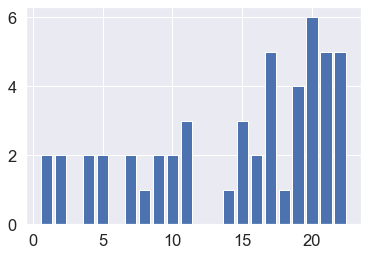

In [33]:
nex_ens = nex.query("AgVar == 'gdd' and GEOID == '19049' and Year <= 2005 and Year >= 1956").T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("AgVar == 'gdd' and GEOID == '19049' and Year <= 2005").values
nex_res = rankz(gmfd_obs, nex_ens)

plt.bar(range(1,nex_ens.shape[0]+2), nex_res[0])
plt.show()

In [36]:
chisquare(nex_res[0])

Power_divergenceResult(statistic=11.6, pvalue=0.9497925334775601)

In [ ]:
#######################

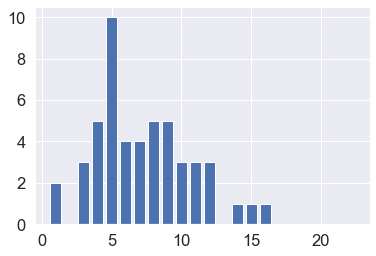

In [55]:
cmip_ens = cmip.query("AgVar == 'gdd' and Year <= 2005 and Year >= 1956").groupby(["Year"]).mean().T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("AgVar == 'gdd' and Year <= 2005").groupby(["Year"]).mean().values
cmip_gdd = rankz(gmfd_obs, cmip_ens)

plt.bar(range(1,cmip_ens.shape[0]+2), cmip_res[0])
plt.show()

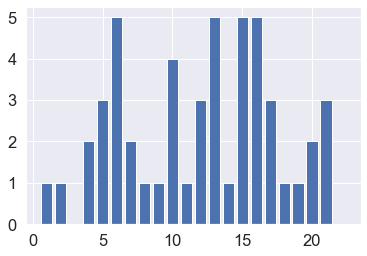

In [52]:
nex_ens = nex.query("AgVar == 'egdd' and Year <= 2005 and Year >= 1956").groupby(["Year"]).mean().T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("AgVar == 'egdd' and Year <= 2005").groupby(["Year"]).mean().values
nex_egdd = rankz(gmfd_obs, nex_ens)

plt.bar(range(1,nex_ens.shape[0]+2), nex_res[0])
plt.show()

In [46]:
chisquare(nex_res[0])

Power_divergenceResult(statistic=50.31999999999999, pvalue=0.000329199388771565)

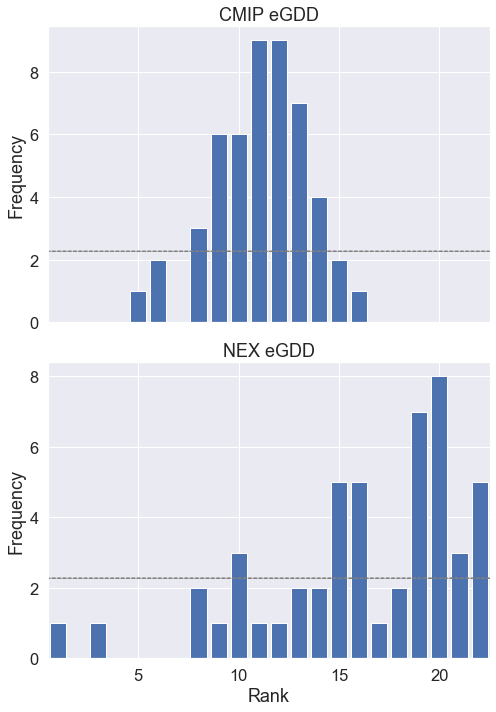

In [77]:
fig, ax = plt.subplots(2,1, figsize = (7,10), sharex = True)

ax[0].bar(range(1,cmip_ens.shape[0]+2), cmip_egdd[0])
ax[0].arrow(0., 1/22. * 50, 22.5, 0., color="gray", ls = "--")
ax[1].bar(range(1,nex_ens.shape[0]+2), nex_egdd[0])
ax[1].arrow(0., 1/22. * 50, 22.5, 0., color="gray", ls = "--")

ax[0].set_title("CMIP eGDD")
ax[1].set_title("NEX eGDD")

ax[0].set_xlim([0.5,22.5])

ax[1].set_xlabel("Rank")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.savefig("./output/figs/egdd_rankHist.png", dpi = 500)